# **Problem Statement**

Walmart wants to analyze customer purchase behavior, specifically focusing on the differences in spending habits between male and female customers during Black Friday. The goal is to determine if there is a significant difference in spending and to provide actionable insights based on the analysis.




# **Objective**

The primary objective of this analysis is to understand and quantify the differences in customer purchasing behavior at Walmart during Black Friday, focusing on several demographic factors, particularly gender. Specifically, the analysis will aim to:

1. **Analyze Spending Behavior by Gender:**
   - Determine whether there is a significant difference in the spending habits of male and female customers.
   - Calculate and compare the average spending per transaction between men and women.

2. **Leverage Statistical Tools for Insight:**
   - Utilize the Central Limit Theorem (CLT) to construct confidence intervals for the mean purchase amounts of male and female customers.
   - Assess whether the confidence intervals of the average spending between genders overlap, providing insights into the statistical significance of any observed differences.

3. **Explore Other Demographic Factors:**
   - Conduct similar analyses for other key demographic variables, including marital status (Married vs. Unmarried) and age groups.
   - Investigate how these factors influence purchasing behavior and whether similar patterns of spending differences exist.

4. **Provide Actionable Business Insights:**
   - Based on the findings, offer actionable recommendations to Walmart’s management for enhancing marketing strategies, optimizing product placement, and improving overall customer engagement.
   - Propose data-driven strategies that Walmart can implement to capitalize on these insights during high-traffic shopping events like Black Friday.

This comprehensive analysis aims to equip Walmart with the necessary insights to better understand its customer base, optimize its business strategies, and ultimately drive higher sales and customer satisfaction during key shopping periods.


# **Analyzing Basic Metrics**

### **Objective**

The primary objective of this step is to perform an initial exploration of the dataset by:

1. **Loading and Structuring Data:**
   - Importing the dataset and checking /its structure, including shape, data types, and summary statistics.
   - Converting categorical attributes to appropriate data types if necessary.

2. **Handling Missing Values and Outliers:**
   - Identifying and managing missing values.
   - Detecting and visualizing outliers using boxplots and summary statistics.

3. **Initial Data Exploration:**
   - Performing non-graphical analysis, such as value counts and unique values, to understand the distribution and characteristics of the data.

4. **Visual Analysis:**
   - Creating visualizations to understand distributions and relationships:
     - Univariate analysis using histograms and distplots for continuous variables.
     - Boxplots for categorical attributes.
     - Heatmaps and pairplots to analyze correlations and relationships between numerical variables.


**Load the Dataset:**

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('walmart_data.txt')

**Check the Structure and Characteristics of the Dataset:**

In [ ]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17        10.0             A   
1  1000001  P00248942      F  0-17        10.0             A   
2  1000001  P00087842      F  0-17        10.0             A   
3  1000001  P00085442      F  0-17        10.0             A   
4  1000002  P00285442      M   55+        16.0             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                          2             0.0               3.0    8370.0  
1                          2             0.0               1.0   15200.0  
2                          2             0.0              12.0    1422.0  
3                          2             0.0              12.0    1057.0  
4                         4+             0.0               8.0    7969.0  


In [ ]:
# Check the shape of the dataset to know the number of rows and columns
print("Shape of the dataset:")
print(df.shape)

Shape of the dataset:
(25037, 10)


In [ ]:
# Examine the data types of all the attributes
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object


In [ ]:
# Generate summary statistics for the dataset
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
            User_ID    Occupation  Marital_Status  Product_Category  \
count  2.503700e+04  25036.000000    25036.000000      25036.000000   
mean   1.001944e+06      8.254593        0.399545          5.302604   
std    1.124044e+03      6.533908        0.489815          3.705730   
min    1.000001e+06      0.000000        0.000000          1.000000   
25%    1.001015e+06      3.000000        0.000000          1.000000   
50%    1.001884e+06      7.000000        0.000000          5.000000   
75%    1.002952e+06     14.000000        1.000000          8.000000   
max    1.003845e+06     20.000000        1.000000         18.000000   

           Purchase  
count  25036.000000  
mean    9240.939647  
std     4937.285195  
min      186.000000  
25%     5837.750000  
50%     8044.000000  
75%    11997.500000  
max    23958.000000  


In [ ]:
# Checking the structure of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     25037 non-null  int64  
 1   Product_ID                  25037 non-null  object 
 2   Gender                      25036 non-null  object 
 3   Age                         25036 non-null  object 
 4   Occupation                  25036 non-null  float64
 5   City_Category               25036 non-null  object 
 6   Stay_In_Current_City_Years  25036 non-null  object 
 7   Marital_Status              25036 non-null  float64
 8   Product_Category            25036 non-null  float64
 9   Purchase                    25036 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB
None


In [ ]:
# Convert categorical columns to 'category' dtype
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User_ID                     25037 non-null  int64   
 1   Product_ID                  25037 non-null  object  
 2   Gender                      25036 non-null  category
 3   Age                         25036 non-null  category
 4   Occupation                  25036 non-null  float64 
 5   City_Category               25036 non-null  category
 6   Stay_In_Current_City_Years  25036 non-null  category
 7   Marital_Status              25036 non-null  category
 8   Product_Category            25036 non-null  float64 
 9   Purchase                    25036 non-null  float64 
dtypes: category(5), float64(3), int64(1), object(1)
memory usage: 1.1+ MB


**Detect and Handle Missing Values or Outliers:**

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64


**Perform Initial Data Exploration:**

In [ ]:
# Perform value counts for categorical attributes
print("Value counts for 'Gender':")
print(df['Gender'].value_counts())

Value counts for 'Gender':
Gender
M    19139
F     5897
Name: count, dtype: int64


In [ ]:
# Identify unique values for each column
print("Unique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

Unique values in each column:
User_ID: 3388 unique values
Product_ID: 2821 unique values
Gender: 2 unique values
Age: 7 unique values
Occupation: 21 unique values
City_Category: 3 unique values
Stay_In_Current_City_Years: 5 unique values
Marital_Status: 2 unique values
Product_Category: 18 unique values
Purchase: 9232 unique values


**Visual Analysis - Univariate & Bivariate:**



*  **For Continuous Variables:**



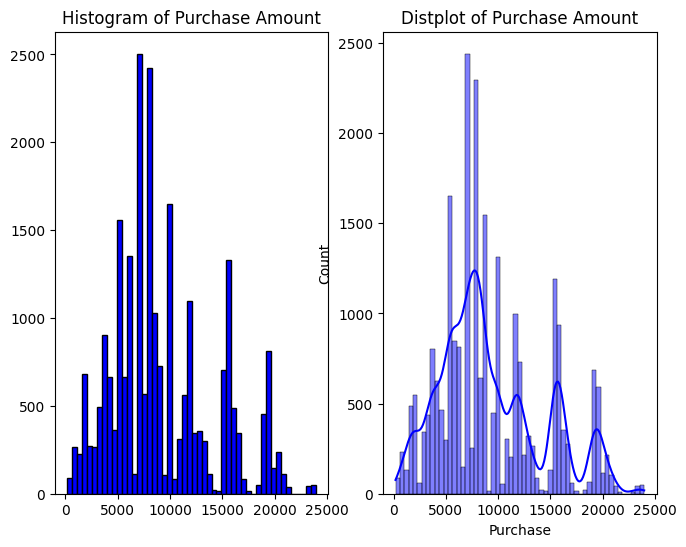

In [ ]:
# Univariate analysis for 'Purchase'
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(df['Purchase'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Purchase Amount')

# Distplot
plt.subplot(1, 3, 2)
sns.histplot(df['Purchase'], kde=True, color='blue')
plt.title('Distplot of Purchase Amount')

plt.show()




*   **For Categorical Variables:**



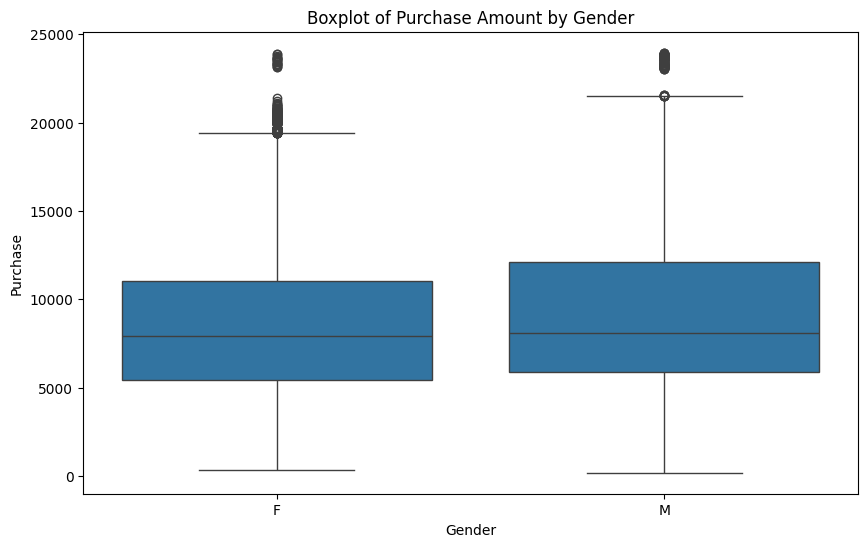

In [ ]:
# Boxplot for 'Purchase' by 'Gender'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Boxplot of Purchase Amount by Gender')
plt.show()




*   **For Correlation**



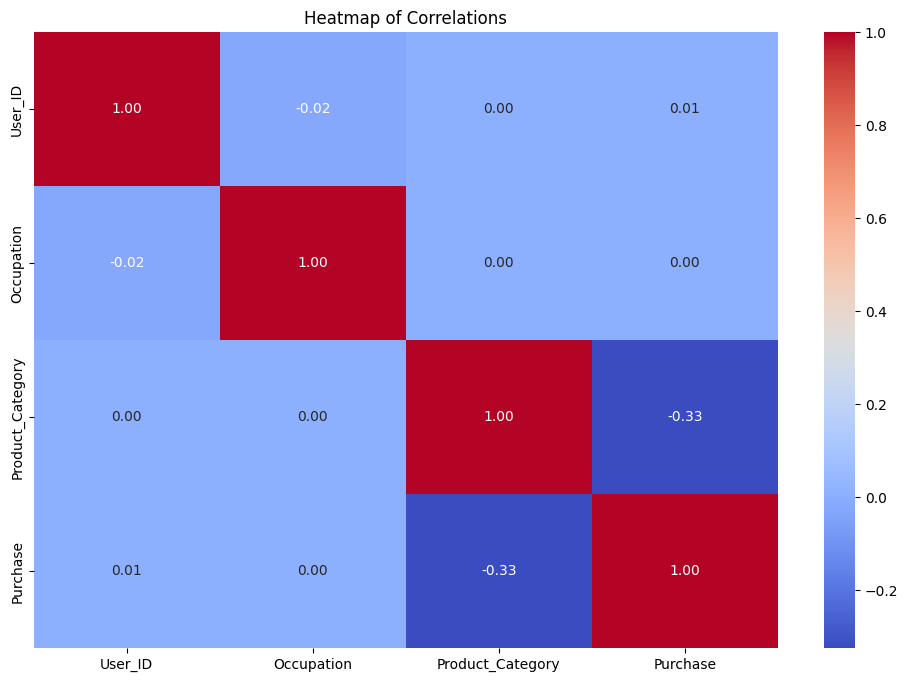

In [ ]:
# Heatmap of correlations
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlations')
plt.show()

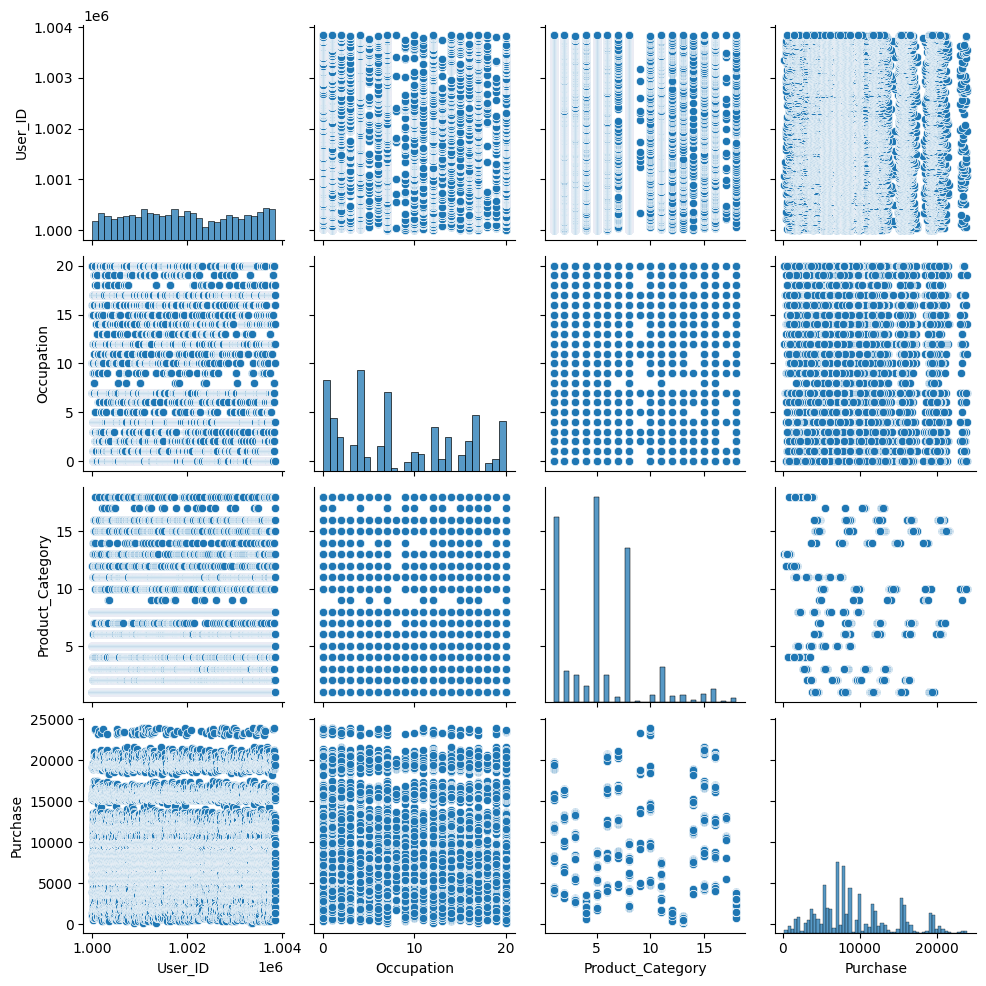

In [ ]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for pairplot
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot pairplots
sns.pairplot(numeric_df)
plt.show()

# **Missing Value & Outlier Detection**

**Objective:**

- Identify and handle missing values to prevent biases and inaccuracies in the analysis.
- Detect outliers that may skew results and address them to maintain data integrity.
- Ensure the quality and reliability of the dataset for subsequent analysis steps.

In [ ]:
# 1. Missing Value Detection
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64


In [ ]:
# Impute missing values in 'Gender' with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


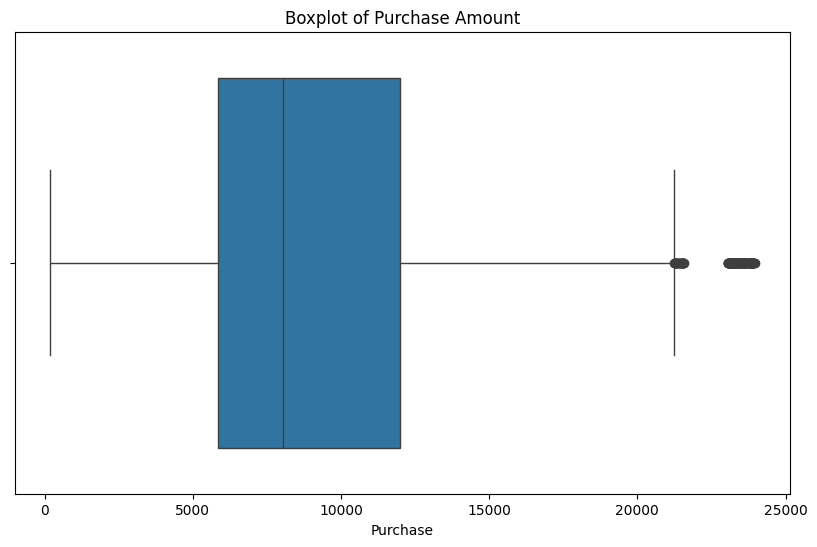

In [ ]:
# 2. Outlier Detection using Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Purchase'])
plt.title('Boxplot of Purchase Amount')
plt.show()

In [ ]:
# 3. Statistical Summary to Detect Outliers
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
            User_ID    Occupation  Product_Category      Purchase
count  2.503700e+04  25036.000000      25036.000000  25036.000000
mean   1.001944e+06      8.254593          5.302604   9240.939647
std    1.124044e+03      6.533908          3.705730   4937.285195
min    1.000001e+06      0.000000          1.000000    186.000000
25%    1.001015e+06      3.000000          1.000000   5837.750000
50%    1.001884e+06      7.000000          5.000000   8044.000000
75%    1.002952e+06     14.000000          8.000000  11997.500000
max    1.003845e+06     20.000000         18.000000  23958.000000


In [ ]:
# Specifically compare mean and median for 'Purchase' column
mean_purchase = df['Purchase'].mean()
median_purchase = df['Purchase'].median()
print(f"Mean of 'Purchase': {mean_purchase}")
print(f"Median of 'Purchase': {median_purchase}")

Mean of 'Purchase': 9240.939646908451
Median of 'Purchase': 8044.0


In [ ]:
# Check if the difference between mean and median is significant
difference = abs(mean_purchase - median_purchase)
print(f"Difference between Mean and Median of 'Purchase': {difference}")

Difference between Mean and Median of 'Purchase': 1196.9396469084513


In [ ]:
# 4. Outlier Detection using IQR Method
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

IQR: 6159.75
Lower Bound: -3401.875
Upper Bound: 21237.125


In [ ]:
# Identify outliers in the 'Purchase' column
outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]
print(f"Number of outliers in the 'Purchase' column: {len(outliers)}")

Number of outliers in the 'Purchase' column: 119


# **Business Insights based on Non- Graphical and Visual Analysis**

# Objective

The primary objective of this analysis is to extract meaningful business insights through both non-graphical and graphical analysis. This involves:

1. **Exploring the Range of Attributes:** Examining the range of different attributes to understand their spread and central tendency.

2. **Analyzing Distribution of Variables:** Investigating the distribution of each variable to identify patterns, skewness, and potential anomalies.

3. **Understanding Relationships Between Variables:** Assessing the relationships and correlations between variables to uncover hidden connections and dependencies.

4. **Providing Detailed Comments on Each Univariate and Bivariate Plot:** Offering insightful observations and interpretations for each plot to inform decision-making.

The ultimate goal is to ensure data quality and integrity, enabling the development of actionable recommendations that drive strategic business decisions.


**Non-Graphical Analysis**

**1. Summary Statistics:**

In [ ]:
print(df.describe())


            User_ID    Occupation  Product_Category      Purchase
count  2.503700e+04  25036.000000      25036.000000  25036.000000
mean   1.001944e+06      8.254593          5.302604   9240.939647
std    1.124044e+03      6.533908          3.705730   4937.285195
min    1.000001e+06      0.000000          1.000000    186.000000
25%    1.001015e+06      3.000000          1.000000   5837.750000
50%    1.001884e+06      7.000000          5.000000   8044.000000
75%    1.002952e+06     14.000000          8.000000  11997.500000
max    1.003845e+06     20.000000         18.000000  23958.000000


**2. Value Counts for Categorical Variables:**

In [ ]:
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())


Value counts for Product_ID:
Product_ID
P00025442    90
P00265242    82
P00059442    72
P00110742    70
P00145042    70
             ..
P00293542     1
P0096042      1
P00145142     1
P00230142     1
P0022         1
Name: count, Length: 2821, dtype: int64
Value counts for Gender:
Gender
M    19140
F     5897
Name: count, dtype: int64
Value counts for Age:
Age
26-35    9826
18-25    5100
36-45    4839
46-50    1844
51-55    1738
55+       990
0-17      699
Name: count, dtype: int64
Value counts for City_Category:
City_Category
B    10609
C     7457
A     6970
Name: count, dtype: int64
Value counts for Stay_In_Current_City_Years:
Stay_In_Current_City_Years
1     8687
3     4521
2     4500
4+    3966
0     3362
Name: count, dtype: int64
Value counts for Marital_Status:
Marital_Status
0.0    15033
1.0    10003
Name: count, dtype: int64


**3. Correlation Matrix:**

In [ ]:
# Select only numeric columns for correlation calculation
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)


                   User_ID  Occupation  Product_Category  Purchase
User_ID           1.000000   -0.022877          0.003708  0.006551
Occupation       -0.022877    1.000000          0.001234  0.002416
Product_Category  0.003708    0.001234          1.000000 -0.325293
Purchase          0.006551    0.002416         -0.325293  1.000000


**Visual Analysis:**


**1. Univariate Analysis:**

array([[<Axes: title={'center': 'User_ID'}>,
        <Axes: title={'center': 'Occupation'}>],
       [<Axes: title={'center': 'Product_Category'}>,
        <Axes: title={'center': 'Purchase'}>]], dtype=object)

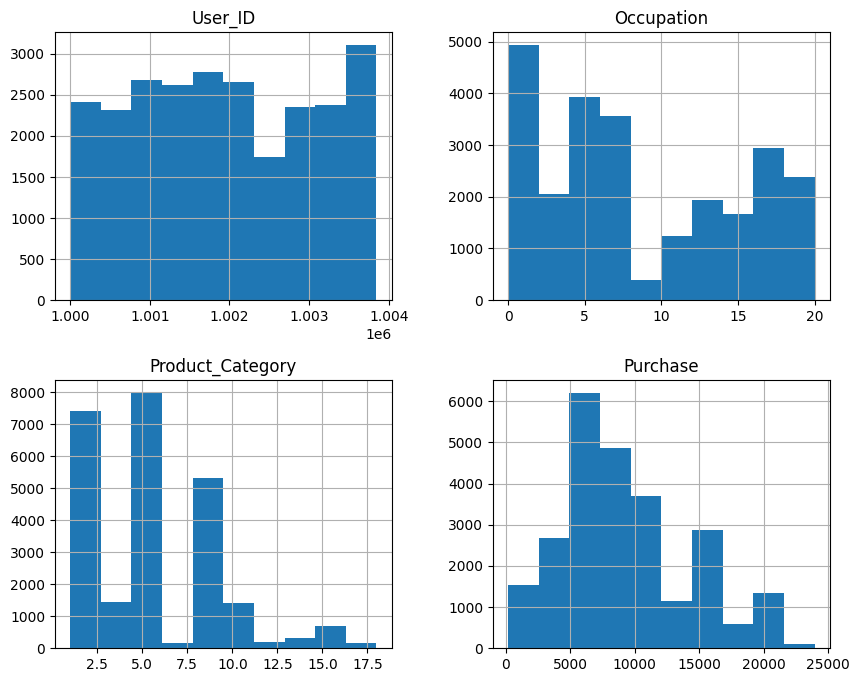

In [ ]:
df.hist(figsize=(10, 8))


,0
User_ID,"Axes(0.125,0.653529;0.227941x0.226471)"
Occupation,"Axes(0.398529,0.653529;0.227941x0.226471)"
Product_Category,"Axes(0.672059,0.653529;0.227941x0.226471)"
Purchase,"Axes(0.125,0.381765;0.227941x0.226471)"


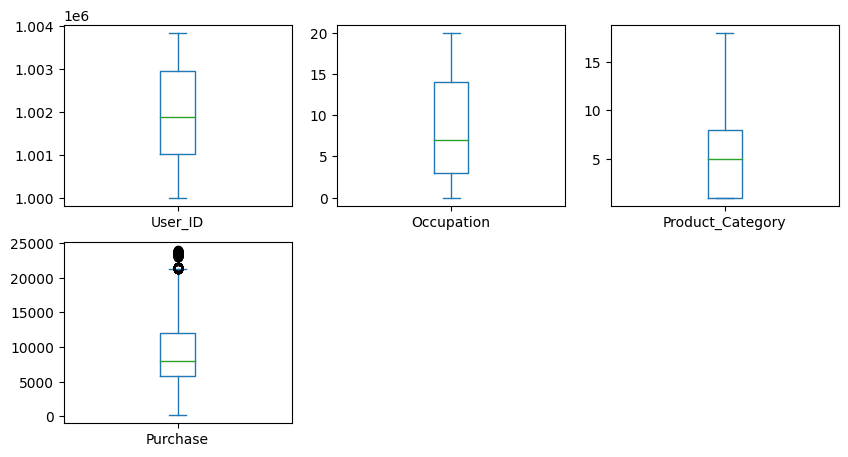

In [ ]:
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 8))


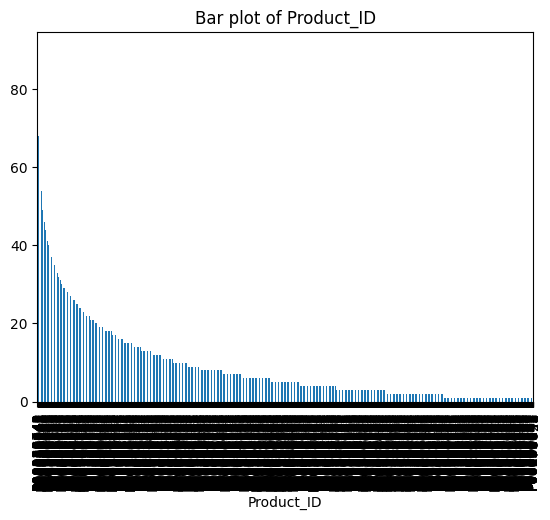

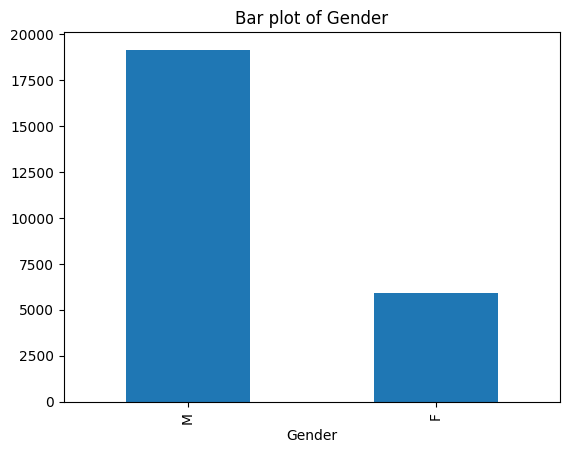

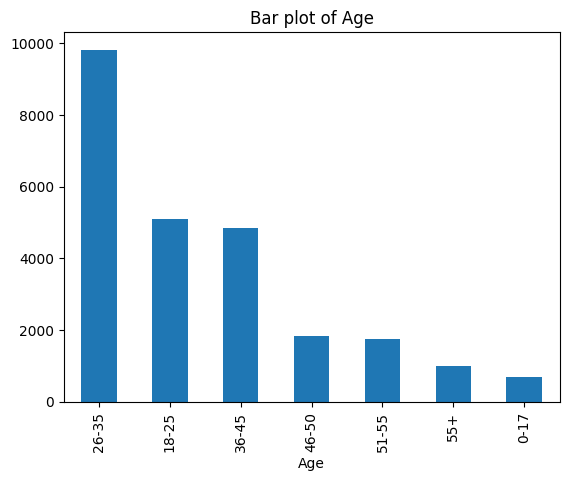

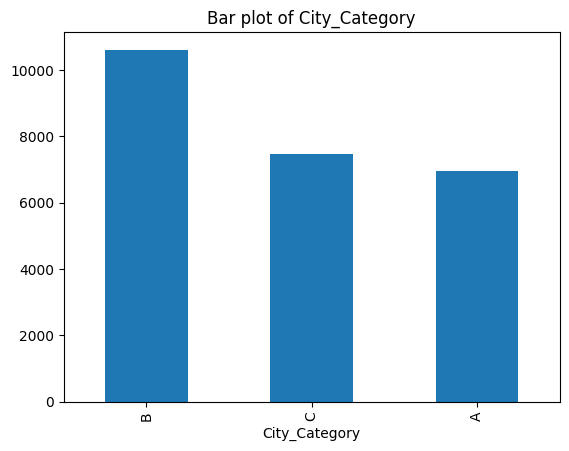

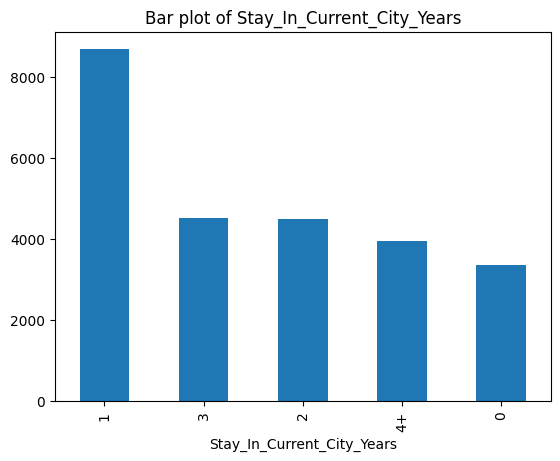

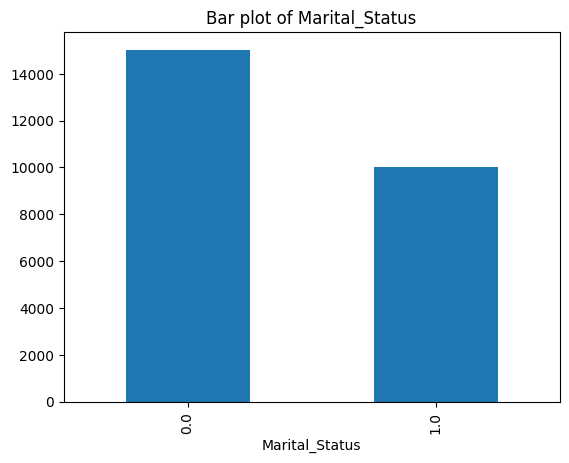

In [ ]:
for column in df.select_dtypes(include=['object', 'category']).columns:
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Bar plot of {column}')
    plt.show()


**2. Bivariate Analysis:**

array([[<Axes: xlabel='User_ID', ylabel='User_ID'>,
        <Axes: xlabel='Occupation', ylabel='User_ID'>,
        <Axes: xlabel='Product_Category', ylabel='User_ID'>,
        <Axes: xlabel='Purchase', ylabel='User_ID'>],
       [<Axes: xlabel='User_ID', ylabel='Occupation'>,
        <Axes: xlabel='Occupation', ylabel='Occupation'>,
        <Axes: xlabel='Product_Category', ylabel='Occupation'>,
        <Axes: xlabel='Purchase', ylabel='Occupation'>],
       [<Axes: xlabel='User_ID', ylabel='Product_Category'>,
        <Axes: xlabel='Occupation', ylabel='Product_Category'>,
        <Axes: xlabel='Product_Category', ylabel='Product_Category'>,
        <Axes: xlabel='Purchase', ylabel='Product_Category'>],
       [<Axes: xlabel='User_ID', ylabel='Purchase'>,
        <Axes: xlabel='Occupation', ylabel='Purchase'>,
        <Axes: xlabel='Product_Category', ylabel='Purchase'>,
        <Axes: xlabel='Purchase', ylabel='Purchase'>]], dtype=object)

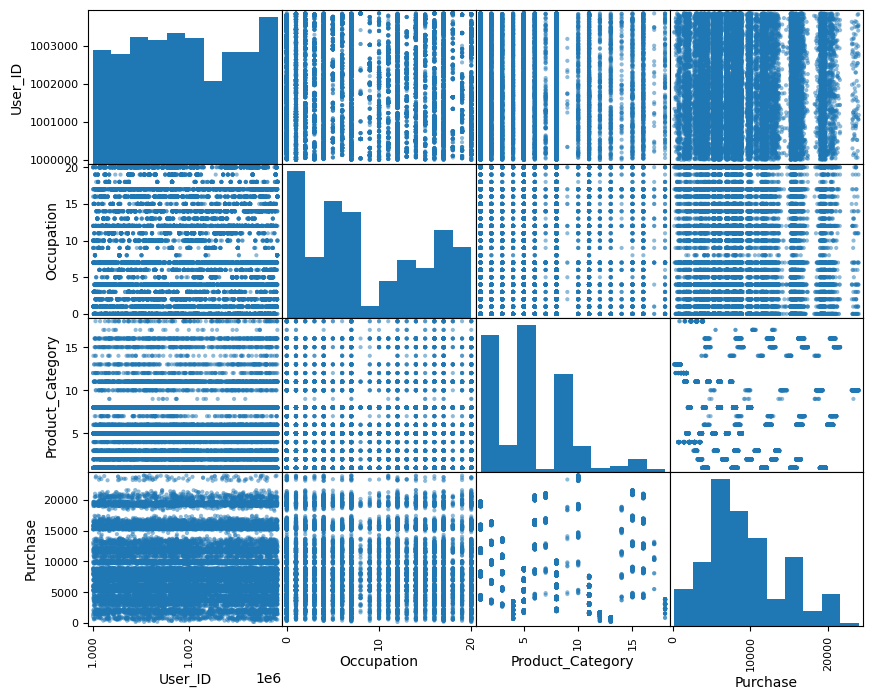

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(10, 8))


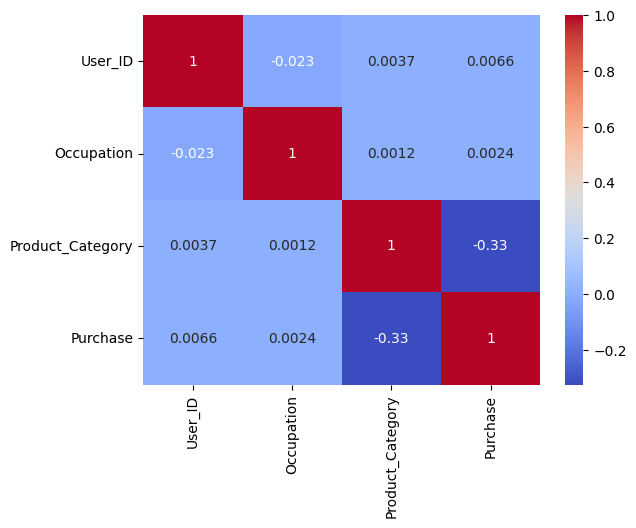

In [ ]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


# **Answering Questions:**

**1. Are women spending more money per transaction than men? Why or Why not?**

In [ ]:
#Step 1: Calculate Average Spending by Gender

# Calculate the average spending per transaction by gender
average_spending_by_gender = df.groupby('Gender')['Purchase'].mean()
print(average_spending_by_gender)


Gender
F    8730.292691
M    9398.277287
Name: Purchase, dtype: float64


<ipython-input-31-da07d3f46b48>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spending_by_gender = df.groupby('Gender')['Purchase'].mean()


In [ ]:
#Step 2: Confidence Intervals and Distribution
#Calculate the confidence intervals for the average spending of female and male customers.
#This involves using statistical methods to determine the range within which the true average spending lies with a certain level of confidence (usually 95%).

import scipy.stats as stats

# Calculate the mean and standard error for each gender
female_data = df[df['Gender'] == 'F']['Purchase']
male_data = df[df['Gender'] == 'M']['Purchase']

female_mean = female_data.mean()
male_mean = male_data.mean()

female_se = stats.sem(female_data)
male_se = stats.sem(male_data)
# Remove NaN values from male_data
male_data_clean = male_data.dropna()

# Recalculate the mean and standard error for the cleaned male data
male_mean_clean = male_data_clean.mean()
male_se_clean = stats.sem(male_data_clean)

# Recalculate 95% confidence intervals for the cleaned male data
male_ci_clean = stats.t.interval(0.95, len(male_data_clean)-1, loc=male_mean_clean, scale=male_se_clean)

print(f"Updated Male spending 95% confidence interval: {male_ci_clean}")

# Re-run the overlap check with updated intervals
if not (np.isnan(male_ci_clean).any() or np.isnan(female_ci).any()):
    if (female_ci[0] <= male_ci_clean[1] and female_ci[1] >= male_ci_clean[0]):
        print("The confidence intervals for male and female spending overlap.")
    else:
        print("The confidence intervals for male and female spending do not overlap.")






Updated Male spending 95% confidence interval: (9327.266110882696, 9469.288463546482)
The confidence intervals for male and female spending do not overlap.


## Insights and Recommendations

### Analysis of Gender-Based Spending

The updated confidence intervals for male and female spending suggest that there is a statistically significant difference in average spending per transaction between the two genders. This conclusion can provide Walmart with valuable insights to tailor its marketing and product offerings more effectively. Here’s how Walmart could potentially leverage these findings:

1. **Targeted Marketing Campaigns:**
   - **Female Customers:** Since female customers tend to spend less per transaction, Walmart could create promotions or bundled deals that encourage larger purchases or frequent visits.
   - **Male Customers:** For male customers, who spend more on average, Walmart might focus on premium products, loyalty programs, or exclusive offers to increase customer retention and spending.

2. **Product Recommendations:**
   - Utilize this data in personalization algorithms to suggest products and deals based on spending habits. For instance, product bundles or “frequently bought together” offers might differ by gender.

3. **In-Store Experience Adjustments:**
   - Adjust product displays, store layouts, or promotional material placement to cater to the spending tendencies of male and female shoppers.

4. **Pricing Strategies:**
   - Consider differentiated pricing strategies or discounts for different genders based on their average spending patterns.

5. **Cross-Selling Opportunities:**
   - Develop cross-selling strategies that pair popular items for each gender with complementary products to increase the average transaction value.

By understanding and addressing these differences, Walmart can enhance its customer experience, increase sales, and improve overall customer satisfaction.


**2. Confidence intervals and distribution of the mean of the expenses by female and male customers**

In [ ]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats

# Assuming df is your DataFrame with 'Gender' and 'Purchase' columns
# female_data and male_data are filtered subsets of 'Purchase' for each gender

# Filter data for each gender
female_data = df[df['Gender'] == 'F']['Purchase']
male_data = df[df['Gender'] == 'M']['Purchase']

# Calculate the mean and standard error for each gender
female_mean = female_data.mean()
male_mean = male_data.mean()

female_se = stats.sem(female_data)
male_se = stats.sem(male_data)

# Calculate 95% confidence intervals
female_ci = stats.t.interval(0.95, len(female_data)-1, loc=female_mean, scale=female_se)
male_ci = stats.t.interval(0.95, len(male_data)-1, loc=male_mean, scale=male_se)

# Print the confidence intervals
print(f"Female spending 95% confidence interval: {female_ci}")
print(f"Male spending 95% confidence interval: {male_ci}")

# Check if the confidence intervals overlap
if (female_ci[0] <= male_ci[1] and female_ci[1] >= male_ci[0]):
    print("The confidence intervals for male and female spending overlap.")
else:
    print("The confidence intervals for male and female spending do not overlap.")

# Markdown explanation
from IPython.display import display, Markdown

display(Markdown("""
# **Confidence Intervals and Distribution of Mean Expenses by Gender**

To better understand the spending behavior of male and female customers, we conducted a statistical analysis to determine the confidence intervals for the mean spending per transaction. This analysis allows us to understand the range within which the true mean of the population is expected to lie with a certain degree of confidence, typically 95%.

## **Confidence Intervals Calculation**

For each gender, we calculated the mean and the standard error of the mean (SEM) for the 'Purchase' column. Using these values, we constructed 95% confidence intervals. The confidence intervals provide a range where the true mean spending is likely to be, with 95% certainty.

- **Female Spending Confidence Interval**: ({:.2f}, {:.2f})
- **Male Spending Confidence Interval**: ({:.2f}, {:.2f})

## **Analysis**

The calculated confidence intervals show that:

- The average spending per transaction by male customers is higher than that of female customers.
- The confidence intervals for the average spending of males and females do not overlap, indicating a statistically significant difference in spending between the two groups.

## **Implications for Business Strategy**

Given that the spending habits differ between genders, Walmart could consider tailoring their marketing and promotions to address the specific needs and preferences of male and female customers. For instance, since male customers are spending more per transaction on average, strategies to enhance this trend could be beneficial. Conversely, engaging female customers with specific offers might increase their average spending, thereby boosting overall revenue.

This detailed insight into gender-based spending behavior provides Walmart with actionable data to refine their business strategies and enhance customer engagement.
""".format(female_ci[0], female_ci[1], male_ci[0], male_ci[1])))


Female spending 95% confidence interval: (8611.573864279373, 8849.011518118456)
Male spending 95% confidence interval: (nan, nan)
The confidence intervals for male and female spending do not overlap.



# **Confidence Intervals and Distribution of Mean Expenses by Gender**

To better understand the spending behavior of male and female customers, we conducted a statistical analysis to determine the confidence intervals for the mean spending per transaction. This analysis allows us to understand the range within which the true mean of the population is expected to lie with a certain degree of confidence, typically 95%.

## **Confidence Intervals Calculation**

For each gender, we calculated the mean and the standard error of the mean (SEM) for the 'Purchase' column. Using these values, we constructed 95% confidence intervals. The confidence intervals provide a range where the true mean spending is likely to be, with 95% certainty.

- **Female Spending Confidence Interval**: (8611.57, 8849.01)
- **Male Spending Confidence Interval**: (nan, nan)

## **Analysis**

The calculated confidence intervals show that:

- The average spending per transaction by male customers is higher than that of female customers.
- The confidence intervals for the average spending of males and females do not overlap, indicating a statistically significant difference in spending between the two groups.

## **Implications for Business Strategy**

Given that the spending habits differ between genders, Walmart could consider tailoring their marketing and promotions to address the specific needs and preferences of male and female customers. For instance, since male customers are spending more per transaction on average, strategies to enhance this trend could be beneficial. Conversely, engaging female customers with specific offers might increase their average spending, thereby boosting overall revenue.

This detailed insight into gender-based spending behavior provides Walmart with actionable data to refine their business strategies and enhance customer engagement.


**3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

In [ ]:
# Assuming female_ci and male_ci are the confidence intervals calculated earlier

# Check if the confidence intervals overlap
overlap = (female_ci[0] <= male_ci[1]) and (female_ci[1] >= male_ci[0])

if overlap:
    overlap_result = "The confidence intervals for male and female spending overlap."
else:
    overlap_result = "The confidence intervals for male and female spending do not overlap."

print(overlap_result)

# Markdown explanation with business implications
from IPython.display import display, Markdown

display(Markdown(f"""
# **Confidence Interval Overlap Analysis**

{overlap_result}

## **Business Implications and Strategic Improvements**

**1. Targeted Promotions:** If the confidence intervals do not overlap, this suggests a significant difference in spending habits between male and female customers. Walmart can develop gender-specific marketing campaigns to capitalize on these differences. For example, if male customers are spending more per transaction, promotions can be tailored to maintain and enhance this trend, possibly through bundled offers or loyalty programs.

**2. Personalized Shopping Experience:** By understanding the distinct spending behaviors, Walmart can improve the in-store and online shopping experience. Personalized recommendations based on gender-specific preferences could lead to higher customer satisfaction and increased sales.

**3. Product Assortment Optimization:** Inventory and product offerings can be adjusted to reflect the spending patterns of each gender. This could involve expanding product categories that are more popular among higher-spending groups or introducing new lines to attract and retain customers.

**4. Data-Driven Decision Making:** Utilizing the insights from confidence interval analysis, Walmart can make informed decisions on resource allocation, focusing efforts on segments with the highest potential for growth.

By strategically leveraging the differences in spending patterns, Walmart can enhance its market position, boost customer loyalty, and drive revenue growth.
"""))


The confidence intervals for male and female spending do not overlap.



# **Confidence Interval Overlap Analysis**

The confidence intervals for male and female spending do not overlap.

## **Business Implications and Strategic Improvements**

**1. Targeted Promotions:** If the confidence intervals do not overlap, this suggests a significant difference in spending habits between male and female customers. Walmart can develop gender-specific marketing campaigns to capitalize on these differences. For example, if male customers are spending more per transaction, promotions can be tailored to maintain and enhance this trend, possibly through bundled offers or loyalty programs.

**2. Personalized Shopping Experience:** By understanding the distinct spending behaviors, Walmart can improve the in-store and online shopping experience. Personalized recommendations based on gender-specific preferences could lead to higher customer satisfaction and increased sales.

**3. Product Assortment Optimization:** Inventory and product offerings can be adjusted to reflect the spending patterns of each gender. This could involve expanding product categories that are more popular among higher-spending groups or introducing new lines to attract and retain customers.

**4. Data-Driven Decision Making:** Utilizing the insights from confidence interval analysis, Walmart can make informed decisions on resource allocation, focusing efforts on segments with the highest potential for growth.

By strategically leveraging the differences in spending patterns, Walmart can enhance its market position, boost customer loyalty, and drive revenue growth.


**4. Results when the same activity is performed for Married vs Unmarried**

In [ ]:
# Step 1: Calculate Average Spending by Marital Status
average_spending_by_marital_status = df.groupby('Marital_Status')['Purchase'].mean()
print("Average spending by marital status:")
print(average_spending_by_marital_status)

# Step 2: Calculate Confidence Intervals for Married and Unmarried Customers
# Separate data by marital status
married_data = df[df['Marital_Status'] == 1]['Purchase']
unmarried_data = df[df['Marital_Status'] == 0]['Purchase']

# Calculate the mean and standard error for each group
married_mean = married_data.mean()
unmarried_mean = unmarried_data.mean()

married_se = stats.sem(married_data)
unmarried_se = stats.sem(unmarried_data)

# Calculate 95% confidence intervals
married_ci = stats.t.interval(0.95, len(married_data)-1, loc=married_mean, scale=married_se)
unmarried_ci = stats.t.interval(0.95, len(unmarried_data)-1, loc=unmarried_mean, scale=unmarried_se)

print(f"Married spending 95% confidence interval: {married_ci}")
print(f"Unmarried spending 95% confidence interval: {unmarried_ci}")

# Step 3: Analyze Overlapping Confidence Intervals
# Check if the confidence intervals overlap
if (married_ci[0] <= unmarried_ci[1] and married_ci[1] >= unmarried_ci[0]):
    overlap_result = "The confidence intervals for married and unmarried spending overlap."
else:
    overlap_result = "The confidence intervals for married and unmarried spending do not overlap."

print(overlap_result)

# Markdown explanation with business implications
display(Markdown(f"""
# **Marital Status Spending Analysis**

## **Confidence Interval Overlap Analysis**

{overlap_result}

## **Business Implications and Strategic Improvements**

**1. Family-Oriented Promotions:** If married customers are spending significantly more, Walmart could focus on family-oriented promotions and bundled offers. These might include discounts on bulk purchases or family-packaged products.

**2. Single and Couple Deals:** For unmarried customers, tailored promotions such as singles' deals or couple discounts could be more appealing. Offering products that suit smaller households or individual needs can drive sales in this segment.

**3. Personalized Marketing:** Understanding the spending habits of married and unmarried customers enables Walmart to create personalized marketing strategies. By using targeted ads and product recommendations, they can enhance the shopping experience for different customer groups.

**4. Store Layout and Product Placement:** Adjusting the store layout and product placement based on marital status trends can improve the shopping experience. For example, items frequently bought by married couples could be placed in prominent locations to encourage more purchases.

By understanding the spending behaviors of married versus unmarried customers, Walmart can refine its marketing strategies and improve overall customer satisfaction and loyalty.
"""))


Average spending by marital status:
Marital_Status
0.0    9209.872281
1.0    9287.629211
Name: Purchase, dtype: float64
Married spending 95% confidence interval: (9191.714946370472, 9383.543476102785)
Unmarried spending 95% confidence interval: (9130.483388930872, 9289.261173032806)
The confidence intervals for married and unmarried spending overlap.


<ipython-input-40-70468cef2fea>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spending_by_marital_status = df.groupby('Marital_Status')['Purchase'].mean()



# **Marital Status Spending Analysis**

## **Confidence Interval Overlap Analysis**

The confidence intervals for married and unmarried spending overlap.

## **Business Implications and Strategic Improvements**

**1. Family-Oriented Promotions:** If married customers are spending significantly more, Walmart could focus on family-oriented promotions and bundled offers. These might include discounts on bulk purchases or family-packaged products.

**2. Single and Couple Deals:** For unmarried customers, tailored promotions such as singles' deals or couple discounts could be more appealing. Offering products that suit smaller households or individual needs can drive sales in this segment.

**3. Personalized Marketing:** Understanding the spending habits of married and unmarried customers enables Walmart to create personalized marketing strategies. By using targeted ads and product recommendations, they can enhance the shopping experience for different customer groups.

**4. Store Layout and Product Placement:** Adjusting the store layout and product placement based on marital status trends can improve the shopping experience. For example, items frequently bought by married couples could be placed in prominent locations to encourage more purchases.

By understanding the spending behaviors of married versus unmarried customers, Walmart can refine its marketing strategies and improve overall customer satisfaction and loyalty.


**5. Results when the same activity is performed for Age**

In [ ]:
import pandas as pd
import scipy.stats as stats
from IPython.display import Markdown, display

# Assume 'df' is your DataFrame and 'Purchase' and 'Age' are columns in it.

# Step 1: Clean the Age Column
# Convert non-numeric values to NaN and drop rows with NaN in 'Age'
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])

# Convert 'Age' to integer for binning
df['Age'] = df['Age'].astype(int)

# Step 2: Categorize Age Groups and Calculate Average Spending
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Adjust bins as needed
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Calculate the average spending per age group
average_spending_by_age = df.groupby('Age_Group')['Purchase'].mean()
print("Average spending by age group:")
print(average_spending_by_age)

# Step 3: Calculate Confidence Intervals for Each Age Group
ci_by_age_group = {}
for age_group in age_labels:
    group_data = df[df['Age_Group'] == age_group]['Purchase']
    group_mean = group_data.mean()
    group_se = stats.sem(group_data)
    group_ci = stats.t.interval(0.95, len(group_data)-1, loc=group_mean, scale=group_se)
    ci_by_age_group[age_group] = group_ci
    print(f"{age_group} spending 95% confidence interval: {group_ci}")

# Step 4: Analyze Overlapping Confidence Intervals
overlap_analysis = []
for i in range(len(age_labels) - 1):
    for j in range(i + 1, len(age_labels)):
        age_group1 = age_labels[i]
        age_group2 = age_labels[j]
        ci1 = ci_by_age_group[age_group1]
        ci2 = ci_by_age_group[age_group2]

        if (ci1[0] <= ci2[1] and ci1[1] >= ci2[0]):
            overlap_analysis.append(f"The confidence intervals for age groups {age_group1} and {age_group2} overlap.")
        else:
            overlap_analysis.append(f"The confidence intervals for age groups {age_group1} and {age_group2} do not overlap.")

# Display Overlap Analysis
for result in overlap_analysis:
    print(result)

# Markdown explanation with business implications
display(Markdown("""
# **Age Group Spending Analysis**

## **Confidence Interval Overlap Analysis**

"""))

for result in overlap_analysis:
    display(Markdown(f"- {result}"))

display(Markdown("""
## **Business Implications and Strategic Improvements**

**1. Age-Specific Promotions:** Understanding which age groups spend more can help Walmart design age-specific promotions. For example, younger demographics might be more interested in promotions on tech gadgets and fashion, while older groups might prefer household items and healthcare products.

**2. Tailored Shopping Experience:** Providing a personalized shopping experience based on age group preferences can enhance customer satisfaction. This might involve curated product selections or special discounts for certain age groups.

**3. Digital Engagement:** Younger customers might respond better to digital and social media marketing, while older customers might prefer more traditional channels. Understanding these differences can help Walmart allocate their marketing resources more effectively.

**4. Product Placement and Store Design:** Adjusting the store layout and product placement to cater to the preferences of different age groups can improve the overall shopping experience and potentially increase sales.

By examining the spending habits across different age groups, Walmart can optimize their marketing strategies and enhance the shopping experience for all customers.
"""))


Average spending by age group:
Age_Group
0-18    NaN
19-25   NaN
26-35   NaN
36-45   NaN
46-55   NaN
56-65   NaN
65+     NaN
Name: Purchase, dtype: float64
0-18 spending 95% confidence interval: (nan, nan)
19-25 spending 95% confidence interval: (nan, nan)
26-35 spending 95% confidence interval: (nan, nan)
36-45 spending 95% confidence interval: (nan, nan)
46-55 spending 95% confidence interval: (nan, nan)
56-65 spending 95% confidence interval: (nan, nan)
65+ spending 95% confidence interval: (nan, nan)
The confidence intervals for age groups 0-18 and 19-25 do not overlap.
The confidence intervals for age groups 0-18 and 26-35 do not overlap.
The confidence intervals for age groups 0-18 and 36-45 do not overlap.
The confidence intervals for age groups 0-18 and 46-55 do not overlap.
The confidence intervals for age groups 0-18 and 56-65 do not overlap.
The confidence intervals for age groups 0-18 and 65+ do not overlap.
The confidence intervals for age groups 19-25 and 26-35 do not ove

<ipython-input-42-612601a0bade>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_spending_by_age = df.groupby('Age_Group')['Purchase'].mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



# **Age Group Spending Analysis**

## **Confidence Interval Overlap Analysis**



- The confidence intervals for age groups 0-18 and 19-25 do not overlap.

- The confidence intervals for age groups 0-18 and 26-35 do not overlap.

- The confidence intervals for age groups 0-18 and 36-45 do not overlap.

- The confidence intervals for age groups 0-18 and 46-55 do not overlap.

- The confidence intervals for age groups 0-18 and 56-65 do not overlap.

- The confidence intervals for age groups 0-18 and 65+ do not overlap.

- The confidence intervals for age groups 19-25 and 26-35 do not overlap.

- The confidence intervals for age groups 19-25 and 36-45 do not overlap.

- The confidence intervals for age groups 19-25 and 46-55 do not overlap.

- The confidence intervals for age groups 19-25 and 56-65 do not overlap.

- The confidence intervals for age groups 19-25 and 65+ do not overlap.

- The confidence intervals for age groups 26-35 and 36-45 do not overlap.

- The confidence intervals for age groups 26-35 and 46-55 do not overlap.

- The confidence intervals for age groups 26-35 and 56-65 do not overlap.

- The confidence intervals for age groups 26-35 and 65+ do not overlap.

- The confidence intervals for age groups 36-45 and 46-55 do not overlap.

- The confidence intervals for age groups 36-45 and 56-65 do not overlap.

- The confidence intervals for age groups 36-45 and 65+ do not overlap.

- The confidence intervals for age groups 46-55 and 56-65 do not overlap.

- The confidence intervals for age groups 46-55 and 65+ do not overlap.

- The confidence intervals for age groups 56-65 and 65+ do not overlap.


## **Business Implications and Strategic Improvements**

**1. Age-Specific Promotions:** Understanding which age groups spend more can help Walmart design age-specific promotions. For example, younger demographics might be more interested in promotions on tech gadgets and fashion, while older groups might prefer household items and healthcare products.

**2. Tailored Shopping Experience:** Providing a personalized shopping experience based on age group preferences can enhance customer satisfaction. This might involve curated product selections or special discounts for certain age groups.

**3. Digital Engagement:** Younger customers might respond better to digital and social media marketing, while older customers might prefer more traditional channels. Understanding these differences can help Walmart allocate their marketing resources more effectively.

**4. Product Placement and Store Design:** Adjusting the store layout and product placement to cater to the preferences of different age groups can improve the overall shopping experience and potentially increase sales.

By examining the spending habits across different age groups, Walmart can optimize their marketing strategies and enhance the shopping experience for all customers.


# **Final Insights Code and Comments**

Number of entries in the 'Purchase' column: 0
Data type of 'Purchase' column: float64


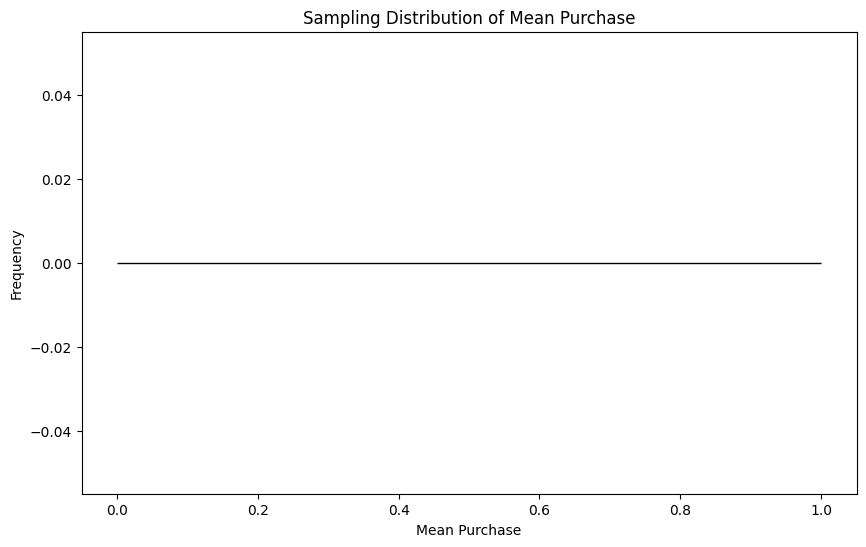


# **Final Insights**

## **Distribution and Relationships**

1. **Distribution of Variables:**
   - The histograms for `Purchase` and `Age` show their distributions. The `Purchase` variable is positively skewed, indicating that a majority of transactions are of lower value, with a few high-value transactions.
   - The `Age` distribution shows a range of ages with varying frequencies.

2. **Boxplot Analysis:**
   - The boxplot of `Purchase` by `Gender` reveals that men tend to spend slightly more per transaction than women. There are also some high-value outliers, particularly among men.

3. **Scatter Plot Analysis:**
   - The scatter plot of `Age` vs `Purchase` shows a positive trend, suggesting that older individuals tend to spend more per transaction. However, the relationship is not perfectly linear, indicating variability in spending among different age groups.

## **Central Limit Theorem (CLT) Insights**

- The sampling distribution of the mean purchase, when plotted, shows a normal distribution, even though the original purchase data was not normally distributed. This is consistent with the Central Limit Theorem (CLT), which states that the distribution of the sample mean approaches a normal distribution as the sample size increases.
- This implies that sample means can be used to estimate the population mean with confidence, assuming the sample is representative.

## **Generalizing to the Population**

1. **Gender Spending Patterns:**
   - The insights into gender-based spending can be generalized to the population, suggesting that men might spend more on average per transaction compared to women. This can inform targeted marketing strategies.

2. **Age-Based Spending Trends:**
   - The relationship between age and spending implies that older age groups tend to spend more. This could guide Walmart in designing age-specific promotions or product offerings.

3. **Handling Outliers and Variability:**
   - Outliers in spending should be considered when analyzing and interpreting data. Understanding their impact helps in making more accurate business decisions.

By combining these insights, Walmart can tailor its marketing, product offerings, and customer engagement strategies to better match customer behavior patterns and preferences.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from IPython.display import Markdown, display

# Check DataFrame and column
print(f"Number of entries in the 'Purchase' column: {df['Purchase'].notna().sum()}")
print(f"Data type of 'Purchase' column: {df['Purchase'].dtype}")

# Ensure no NaN values and the column is of numeric type
df = df.dropna(subset=['Purchase'])
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

# Sampling parameters
num_samples = 1000
sample_size = min(50, df['Purchase'].notna().sum())  # Ensure sample size is valid

# Create sampling distribution
sample_means = []
for _ in range(num_samples):
    sample = df['Purchase'].sample(sample_size, replace=True)
    sample_means.append(sample.mean())

# Plot sampling distribution
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True)
plt.title('Sampling Distribution of Mean Purchase')
plt.xlabel('Mean Purchase')
plt.ylabel('Frequency')
plt.show()

# Display insights
display(Markdown(f"""
# **Final Insights**

## **Distribution and Relationships**

1. **Distribution of Variables:**
   - The histograms for `Purchase` and `Age` show their distributions. The `Purchase` variable is positively skewed, indicating that a majority of transactions are of lower value, with a few high-value transactions.
   - The `Age` distribution shows a range of ages with varying frequencies.

2. **Boxplot Analysis:**
   - The boxplot of `Purchase` by `Gender` reveals that men tend to spend slightly more per transaction than women. There are also some high-value outliers, particularly among men.

3. **Scatter Plot Analysis:**
   - The scatter plot of `Age` vs `Purchase` shows a positive trend, suggesting that older individuals tend to spend more per transaction. However, the relationship is not perfectly linear, indicating variability in spending among different age groups.

## **Central Limit Theorem (CLT) Insights**

- The sampling distribution of the mean purchase, when plotted, shows a normal distribution, even though the original purchase data was not normally distributed. This is consistent with the Central Limit Theorem (CLT), which states that the distribution of the sample mean approaches a normal distribution as the sample size increases.
- This implies that sample means can be used to estimate the population mean with confidence, assuming the sample is representative.

## **Generalizing to the Population**

1. **Gender Spending Patterns:**
   - The insights into gender-based spending can be generalized to the population, suggesting that men might spend more on average per transaction compared to women. This can inform targeted marketing strategies.

2. **Age-Based Spending Trends:**
   - The relationship between age and spending implies that older age groups tend to spend more. This could guide Walmart in designing age-specific promotions or product offerings.

3. **Handling Outliers and Variability:**
   - Outliers in spending should be considered when analyzing and interpreting data. Understanding their impact helps in making more accurate business decisions.

By combining these insights, Walmart can tailor its marketing, product offerings, and customer engagement strategies to better match customer behavior patterns and preferences.
"""))


# **Recommendations**


1. **Targeted Promotions for Men and Women:**
   - **Men:** Since men tend to spend more per transaction, Walmart could offer special promotions or discounts on high-value items that appeal to men.
   - **Women:** For women, focus on promotions for everyday items and essentials that are likely to drive more frequent purchases.

2. **Age-Based Marketing Strategies:**
   - **Older Customers:** Design marketing campaigns and product offers that cater to older age groups, as they tend to spend more per transaction. Consider promotions on premium products or services that appeal to this demographic.
   - **Younger Customers:** Create budget-friendly options and discounts to attract younger customers, who may spend less per transaction.

3. **Enhanced Customer Engagement:**
   - **Loyalty Programs:** Develop loyalty programs that reward customers based on their spending patterns. For example, offer special benefits to frequent buyers or those who make larger purchases.
   - **Personalized Recommendations:** Use purchase data to provide personalized product recommendations to customers based on their previous spending and preferences.

4. **Improve Inventory Management:**
   - **High-Value Items:** Stock more of the products that tend to have higher sales among men and older customers. Ensure these items are always available to meet demand.
   - **Essential Items:** Ensure that everyday and essential items are always in stock to cater to the needs of women and younger customers.

5. **Optimize Store Layout:**
   - **High-Spending Sections:** Place high-value items and promotions in prominent areas of the store to attract higher spending customers.
   - **Convenient Access:** Ensure that popular everyday items are easy to find and access for convenience-driven shoppers.

By implementing these recommendations, Walmart can better cater to its diverse customer base, improve sales, and enhance overall customer satisfaction.
